In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
#Create a set of random latitudes and longitudes, then combine them using the "zip" command
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name #This can be found on github respositories

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [25]:
# Import the requests library.
import requests

# Import the API key. "config" is the file you made earlier in your Jupyter folder
from config import weather_api_key

In [26]:
#Starting URL for OpenWeather API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5660dad41870c72ef86f2066f498b9b2


In [27]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [28]:
#Create an empty list to store the data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.  Use 1 to start at the first iteration of the response for each record and set
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# the "enumerate" function is used to retrieve both the index AND city name on the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | ginir
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | marcona
City not found. Skipping...
Processing Record 6 of Set 1 | padang
Processing Record 7 of Set 1 | menongue
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | sosnovka
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | grand gaube
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | omsukchan
Processing Record 19 of Set 1 | brae
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | lohja
Processing Record 2

Processing Record 37 of Set 4 | salta
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | sarrebourg
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | crotone
Processing Record 44 of Set 4 | mrirt
City not found. Skipping...
Processing Record 45 of Set 4 | utiroa
City not found. Skipping...
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | redcar
Processing Record 50 of Set 4 | port blair
Processing Record 1 of Set 5 | rakiv lis
Processing Record 2 of Set 5 | makokou
Processing Record 3 of Set 5 | alotau
City not found. Skipping...
Processing Record 4 of Set 5 | cameta
Processing Record 5 of Set 5 | tomigusuku
Processing Record 6 of Set 5 | salinas
Processing Record 7 of Set 5 | vetovo
Processing Record 8 of Set 5 | umm 

Processing Record 27 of Set 8 | batagay-alyta
Processing Record 28 of Set 8 | sulangan
Processing Record 29 of Set 8 | navapur
City not found. Skipping...
Processing Record 30 of Set 8 | komsomolskiy
Processing Record 31 of Set 8 | imisli
City not found. Skipping...
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 8 | mirandola
Processing Record 35 of Set 8 | sinkat
City not found. Skipping...
Processing Record 36 of Set 8 | duz
City not found. Skipping...
Processing Record 37 of Set 8 | maragogi
Processing Record 38 of Set 8 | longyan
Processing Record 39 of Set 8 | manzil jamil
City not found. Skipping...
Processing Record 40 of Set 8 | garsten
Processing Record 41 of Set 8 | tevaitoa
Processing Record 42 of Set 8 | keta
Processing Record 43 of Set 8 | sorland
Processing Record 44 of Set 8 | rajura
Processing Record 45 of Set 8 | effium
Processing Record 46 of Set 8 | berlevag
Processing Record 47 

Processing Record 15 of Set 12 | ormara
Processing Record 16 of Set 12 | kuvshinovo
Processing Record 17 of Set 12 | buraydah
Processing Record 18 of Set 12 | gairatganj
Processing Record 19 of Set 12 | koumac
Processing Record 20 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 21 of Set 12 | okato
Processing Record 22 of Set 12 | huarmey
Processing Record 23 of Set 12 | sao raimundo das mangabeiras
Processing Record 24 of Set 12 | zabol
Processing Record 25 of Set 12 | banda aceh
Processing Record 26 of Set 12 | vargas
Processing Record 27 of Set 12 | calvinia
Processing Record 28 of Set 12 | pangai
Processing Record 29 of Set 12 | qiongshan
Processing Record 30 of Set 12 | samfya
Processing Record 31 of Set 12 | hualmay
Processing Record 32 of Set 12 | garden city
Processing Record 33 of Set 12 | sadon
Processing Record 34 of Set 12 | palmer
Processing Record 35 of Set 12 | biak
Processing Record 36 of Set 12 | evensk
Processing Record 37 of Set 12 | caluquembe
Pr

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,74.82,33,0,3.44,AR,2022-01-20 19:44:14
1,Kapaa,22.0752,-159.3190,75.52,79,75,0.00,US,2022-01-20 19:45:11
2,Ginir,7.1333,40.7000,60.87,50,6,5.73,ET,2022-01-20 19:45:11
3,Puerto Ayora,-0.7393,-90.3518,85.96,82,93,9.40,EC,2022-01-20 19:45:11
4,Padang,-0.9492,100.3543,76.95,78,100,2.86,ID,2022-01-20 19:45:12
5,Menongue,-14.6585,17.6910,60.24,81,31,2.42,AO,2022-01-20 19:45:12
6,Bluff,-46.6000,168.3333,56.80,68,54,16.64,NZ,2022-01-20 19:45:12
7,Provideniya,64.3833,-173.3000,-11.63,81,15,6.55,RU,2022-01-20 19:45:13
8,Sosnovka,56.2550,51.2842,17.13,93,100,10.49,RU,2022-01-20 19:45:13
9,Grand Gaube,-20.0064,57.6608,81.00,87,84,1.99,MU,2022-01-20 19:45:14


In [47]:
#Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-01-20 19:44:14,-54.8000,-68.3000,74.82,33,0,3.44
1,Kapaa,US,2022-01-20 19:45:11,22.0752,-159.3190,75.52,79,75,0.00
2,Ginir,ET,2022-01-20 19:45:11,7.1333,40.7000,60.87,50,6,5.73
3,Puerto Ayora,EC,2022-01-20 19:45:11,-0.7393,-90.3518,85.96,82,93,9.40
4,Padang,ID,2022-01-20 19:45:12,-0.9492,100.3543,76.95,78,100,2.86
5,Menongue,AO,2022-01-20 19:45:12,-14.6585,17.6910,60.24,81,31,2.42
6,Bluff,NZ,2022-01-20 19:45:12,-46.6000,168.3333,56.80,68,54,16.64
7,Provideniya,RU,2022-01-20 19:45:13,64.3833,-173.3000,-11.63,81,15,6.55
8,Sosnovka,RU,2022-01-20 19:45:13,56.2550,51.2842,17.13,93,100,10.49
9,Grand Gaube,MU,2022-01-20 19:45:14,-20.0064,57.6608,81.00,87,84,1.99


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
# Import the time module.
import time
# Get today's date in seconds. This is the amount of seconds since Jan 1, 1970.
today = time.time()
today

1642709099.5608902

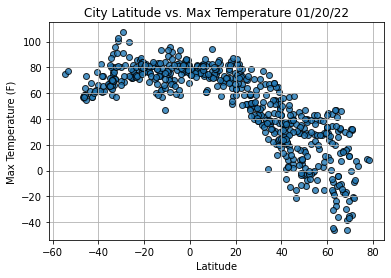

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

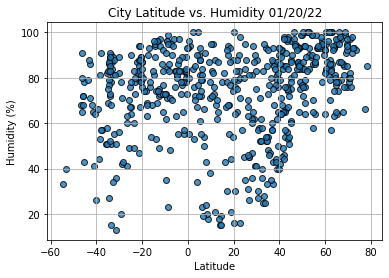

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

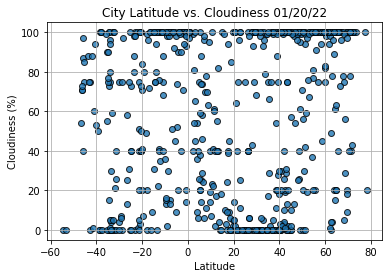

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

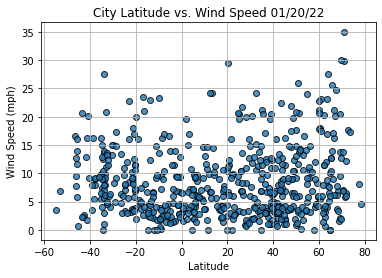

In [43]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
#Create hemishpere data frames
index13 = city_data_df.loc[13]
index13

City                       Torbay
Lat                       47.6666
Lng                      -52.7314
Max Temp                    45.75
Humidity                       94
Cloudiness                    100
Wind Speed                  21.85
Country                        CA
Date          2022-01-20 19:45:15
Name: 13, dtype: object

In [48]:
#You can filter a data frame based on the value of a row meeting certain criteria
#Filter data for all cities in the northern hemisphere (lat >= 0)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2022-01-20 19:45:11,22.0752,-159.3190,75.52,79,75,0.00
2,Ginir,ET,2022-01-20 19:45:11,7.1333,40.7000,60.87,50,6,5.73
7,Provideniya,RU,2022-01-20 19:45:13,64.3833,-173.3000,-11.63,81,15,6.55
8,Sosnovka,RU,2022-01-20 19:45:13,56.2550,51.2842,17.13,93,100,10.49
12,Victoria,HK,2022-01-20 19:40:34,22.2855,114.1577,64.38,83,96,1.99


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

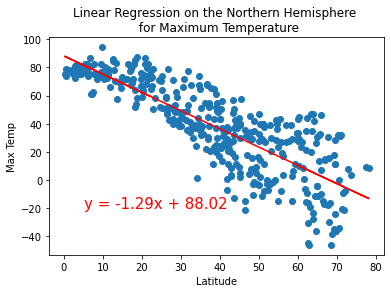

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-20))

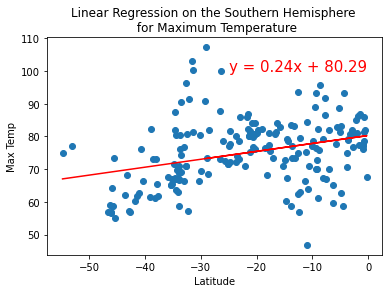

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,100))

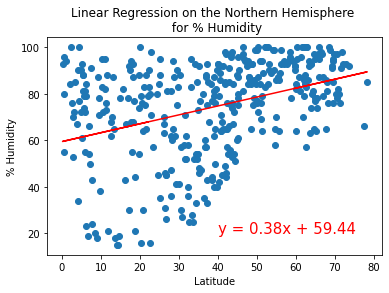

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,20))

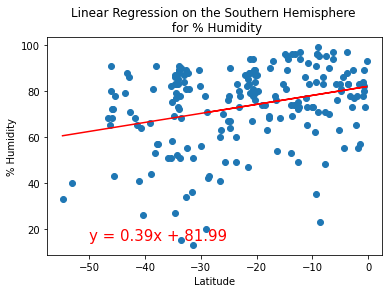

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

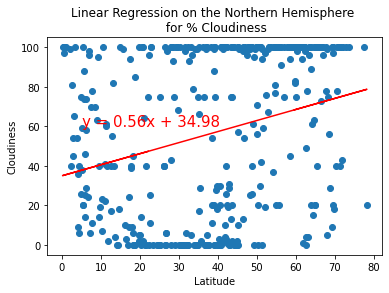

In [74]:
#Skill Drll
# Percent cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(5,60))

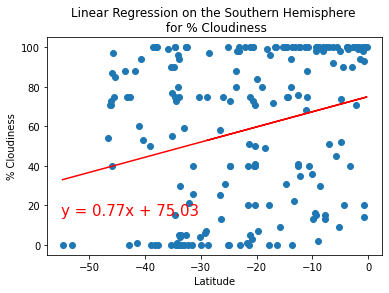

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,15))

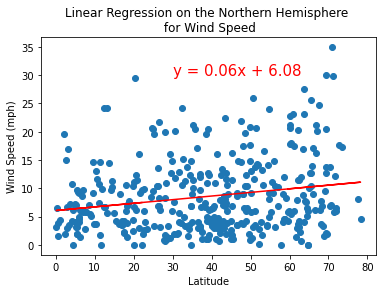

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(30,30))

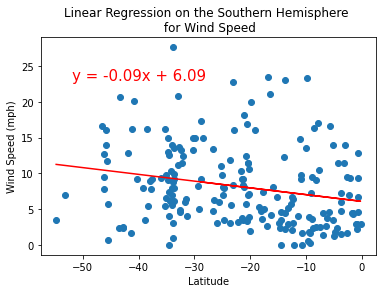

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-52,23))